## Linear Dimensionality Reduction Technique Implementation without Library

In [81]:
##Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

#### Loading Data and Normalization

In [82]:
##Reading File
File = pd.read_csv("DataB.csv")
print(File)

##Removing first index column from file
Clean_data_df = File.iloc[:,1:786]
#print(Clean_data_df)

##Separating Data from file (No Missing Values)
Data_df = Clean_data_df.iloc[:,0:784]
Data_array = np.array(Data_df)
print('Original Data:\n', Data_df)
print('\n')
#print(Data_df.describe())

##Separating gnd values from file
Value_df = Clean_data_df.iloc[:,784]
print('Gnd Value labels:\n', Value_df)
print('\n')

#StandardScalar
D = StandardScaler().fit_transform(Data_array)
print('Standardized Data:\n', D)

##Z-Score Normalization
Z_data = zscore(Data_df)
Norm_data = pd.DataFrame(Z_data)
D = Norm_data.values
print('Normalized Data:\n', Norm_data)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')\

##Both StandardScaler and Normalization outputs are same. (So I'm proceeding with Z-norm Normalization )

      Unnamed: 0  fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  \
0              1      4      4      3      0      0      4      2      1   
1              2      5      1      4      3      1      3      5      1   
2              3      1      3      0      3      1      1      0      1   
3              4      5      3      2      3      5      2      2      0   
4              5      3      5      3      3      0      4      1      1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2061        2062      4      0      3      0      4      0      4      3   
2062        2063      2      2      3      4      2      1      2      3   
2063        2064      2      3      2      3      1      2      5      5   
2064        2065      5      2      4      3      1      0      3      2   
2065        2066      3      3      1      3      2      5      4      2   

      fea.9  ...  fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  \
0         4  

####  Eigen Decomposition (Eigen Vector and Eigen Values)

In [28]:
#Creating a covariance matrix
Cov_Matrix = np.cov(Norm_data.T)
print('Covariance Matrix is:\n', Cov_Matrix)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

##Compute Eigen Values and Eigen Vectors
#np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
eig_val, eig_vec = np.linalg.eig(Cov_Matrix)
print('Eigen Values are:\n', eig_val)
print('\n')
print('Eigen Vectors are:\n', eig_vec)

Covariance Matrix is:
 [[ 1.00048426e+00 -2.02536284e-02  2.80261755e-02 ...  6.12273392e-04
   1.32442087e-02  3.17637187e-02]
 [-2.02536284e-02  1.00048426e+00  2.16756551e-02 ... -9.75510851e-03
   3.61411028e-02 -1.80895701e-02]
 [ 2.80261755e-02  2.16756551e-02  1.00048426e+00 ...  6.04555535e-03
  -2.77143879e-02  3.10482051e-02]
 ...
 [ 6.12273392e-04 -9.75510851e-03  6.04555535e-03 ...  1.00048426e+00
  -1.11265240e-02 -9.86731912e-03]
 [ 1.32442087e-02  3.61411028e-02 -2.77143879e-02 ... -1.11265240e-02
   1.00048426e+00  1.44399871e-02]
 [ 3.17637187e-02 -1.80895701e-02  3.10482051e-02 ... -9.86731912e-03
   1.44399871e-02  1.00048426e+00]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Eigen Values are:
 [5.17773194e+01 2.88008646e+01 2.67709105e+01 2.39303462e+01
 2.15750394e+01 1.58935251e+01 1.38619413e+01 1.19120888e+01
 1.06614183e+01 9.82358285e+00 9.11333621e+00 8.28795842e+00
 7.47022078e+00 7.18685689e+00 7.0182

#### Top 20 Eigen Values Extraction:

In [225]:
##Converting Eigen Value Numpy array to list
Eig_val_list = eig_val.tolist()

##Sorting the Eigen Value list
Eig_val_sort = sorted(Eig_val_list)

##Reversed the Eigen Value to get top 20 Eigen Values
Eigen_Values = list(reversed(Eig_val_sort))
#print('Eigen Values in Decreasing order:\n', Eigen_Values)

Eigen_Values_df = pd.DataFrame(Eigen_Values, columns=['Eigen_Values'])
print('Eigen Values in Decreasing order:\n', Eigen_Values_df.head(20))

Eigen Values in Decreasing order:
      Eigen_Values
0   106920.164597
1    59473.785467
2    55281.930270
3    49416.164843
4    44552.456336
5    32820.129346
6    28624.908752
7    24598.463284
8    22015.828839
9    20285.698578
10   18819.039267
11   17114.634138
12   15426.005915
13   14840.859476
14   14492.618776
15   13895.878533
16   12744.588612
17   12452.682944
18   12332.568619
19   11865.252722


#### Scree plot ('Eigen Values' vs 'Number of Components')

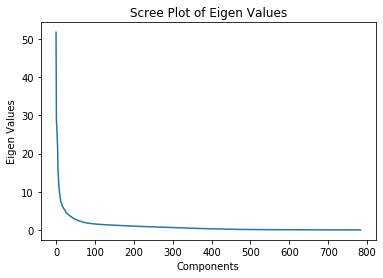

In [30]:
##Plotting Scree Plot
plt.plot(Eigen_Values)
plt.xlabel('Components')
plt.ylabel('Eigen Values')
plt.title('Scree Plot of Eigen Values')
plt.show()

#### Eigen Value Cutoff Analysis:

In [227]:
#Create PCA and calculate explained variance
clf = PCA(random_state=42)
clf.fit(Norm_data)
clf_t = clf.transform(Norm_data)
variance = np.var(clf_t, axis=0)
var_ratio = variance/np.sum(variance)
print(var_ratio*100)
E = (clf.explained_variance_ratio_)*100
print('\n')

Variance =0
count=0
for i in E:
    if(Variance<=85):
        Variance = Variance+i
        count=count+1
        i+=1
print('Variance: ', Variance)
print('\n')
print('Total Number of Eigen Values:', count)

[6.601053 3.671802 3.413004 3.050863 2.750586 2.026254 1.767249 1.518664
 1.359217 1.252402 1.161853 1.056626 0.952373 0.916247 0.894747 0.857906
 0.786827 0.768806 0.761390 0.732539 0.709659 0.680902 0.676968 0.646682
 0.624978 0.604341 0.568654 0.565894 0.557795 0.541819 0.535119 0.526774
 0.510809 0.497157 0.487141 0.479107 0.471822 0.455446 0.451147 0.443165
 0.430736 0.417800 0.407475 0.406387 0.395195 0.383290 0.376945 0.374325
 0.362920 0.357595 0.354105 0.348768 0.348125 0.336615 0.331781 0.327082
 0.316539 0.314320 0.310901 0.307308 0.304193 0.298878 0.294623 0.287955
 0.284303 0.280344 0.274592 0.273558 0.266865 0.263035 0.261678 0.255725
 0.251104 0.249445 0.245554 0.242756 0.239766 0.235001 0.233639 0.231572
 0.230622 0.229529 0.228389 0.226704 0.223545 0.222368 0.220857 0.218903
 0.216172 0.213749 0.213168 0.212160 0.210738 0.209857 0.207372 0.205288
 0.203632 0.203121 0.201648 0.199934 0.198620 0.198436 0.197770 0.195669
 0.194104 0.193585 0.191905 0.191748 0.191021 0.190

**Total Number of Eigen Values should be around 250 as it covers more than 85% of the variance present in data. Along with this, as per Scree plot, line plot has turned into a constant straight line after 250 Eigen values i.e those components don't capture sufficient variance of the data.**

*Ideally Eigen Values should capture more than 85% of the variance present in data(Elbow Method)*

-------------------------------------------------------------------------------------------------------------------------------

#### Plot the projected data with top 20 Eigen Values

In [31]:
## PCA Impementation:
pca_clf = PCA(n_components=20, random_state=42)
#np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
Transformed_data = pca_clf.fit_transform(Norm_data)
print('Transformed Data on 20 Components:\n', Transformed_data)
print('\n')

# Transformed_data_df = pd.DataFrame(Transformed_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])
# print('Transformed Dataframe on 20 Components:\n', Transformed_data_df)

Transformed_data_df = pd.DataFrame(Transformed_data)
print('Transformed Dataframe on 20 Components:\n', Transformed_data_df)
print('\n')

Transformed_datawithgnd_df = pd.concat([Transformed_data_df, Value_df], axis=1)
print('Transformed Dataframe along with label on 20 Components:\n', Transformed_datawithgnd_df)

Transformed Data on 20 Components:
 [[ 9.97069226 -6.18172023 -4.99286906 ...  0.1552698  -1.41841898
  -0.64854447]
 [11.41599979 -6.94158525 -5.0630303  ... -0.99974268 -1.08881449
   0.45484079]
 [ 3.6901192  -4.69309781 -2.90865682 ... -2.88330299  0.67605554
  -4.53087469]
 ...
 [-0.34942155 -0.93368082  8.10744699 ...  1.29852503 -1.31852959
   0.82568963]
 [-3.11526326 -2.09047412  6.27252076 ...  1.36909591  0.07003885
   1.19820831]
 [-5.64409373  0.24616828  4.14017754 ... -2.87514485  1.19559938
  -3.14386943]]


Transformed Dataframe on 20 Components:
               0         1         2         3         4         5         6  \
0      9.970692 -6.181720 -4.992869 -4.394886 -2.777836 -2.844927  1.276327   
1     11.416000 -6.941585 -5.063030 -4.242175 -1.844932 -0.146423  1.683061   
2      3.690119 -4.693098 -2.908657  3.935074 -6.811765 -3.226334  3.663791   
3      7.312408 -6.042886 -3.648017  3.506904 -4.562445 -5.524084  3.972023   
4     18.061520 -1.862437 -4.03883

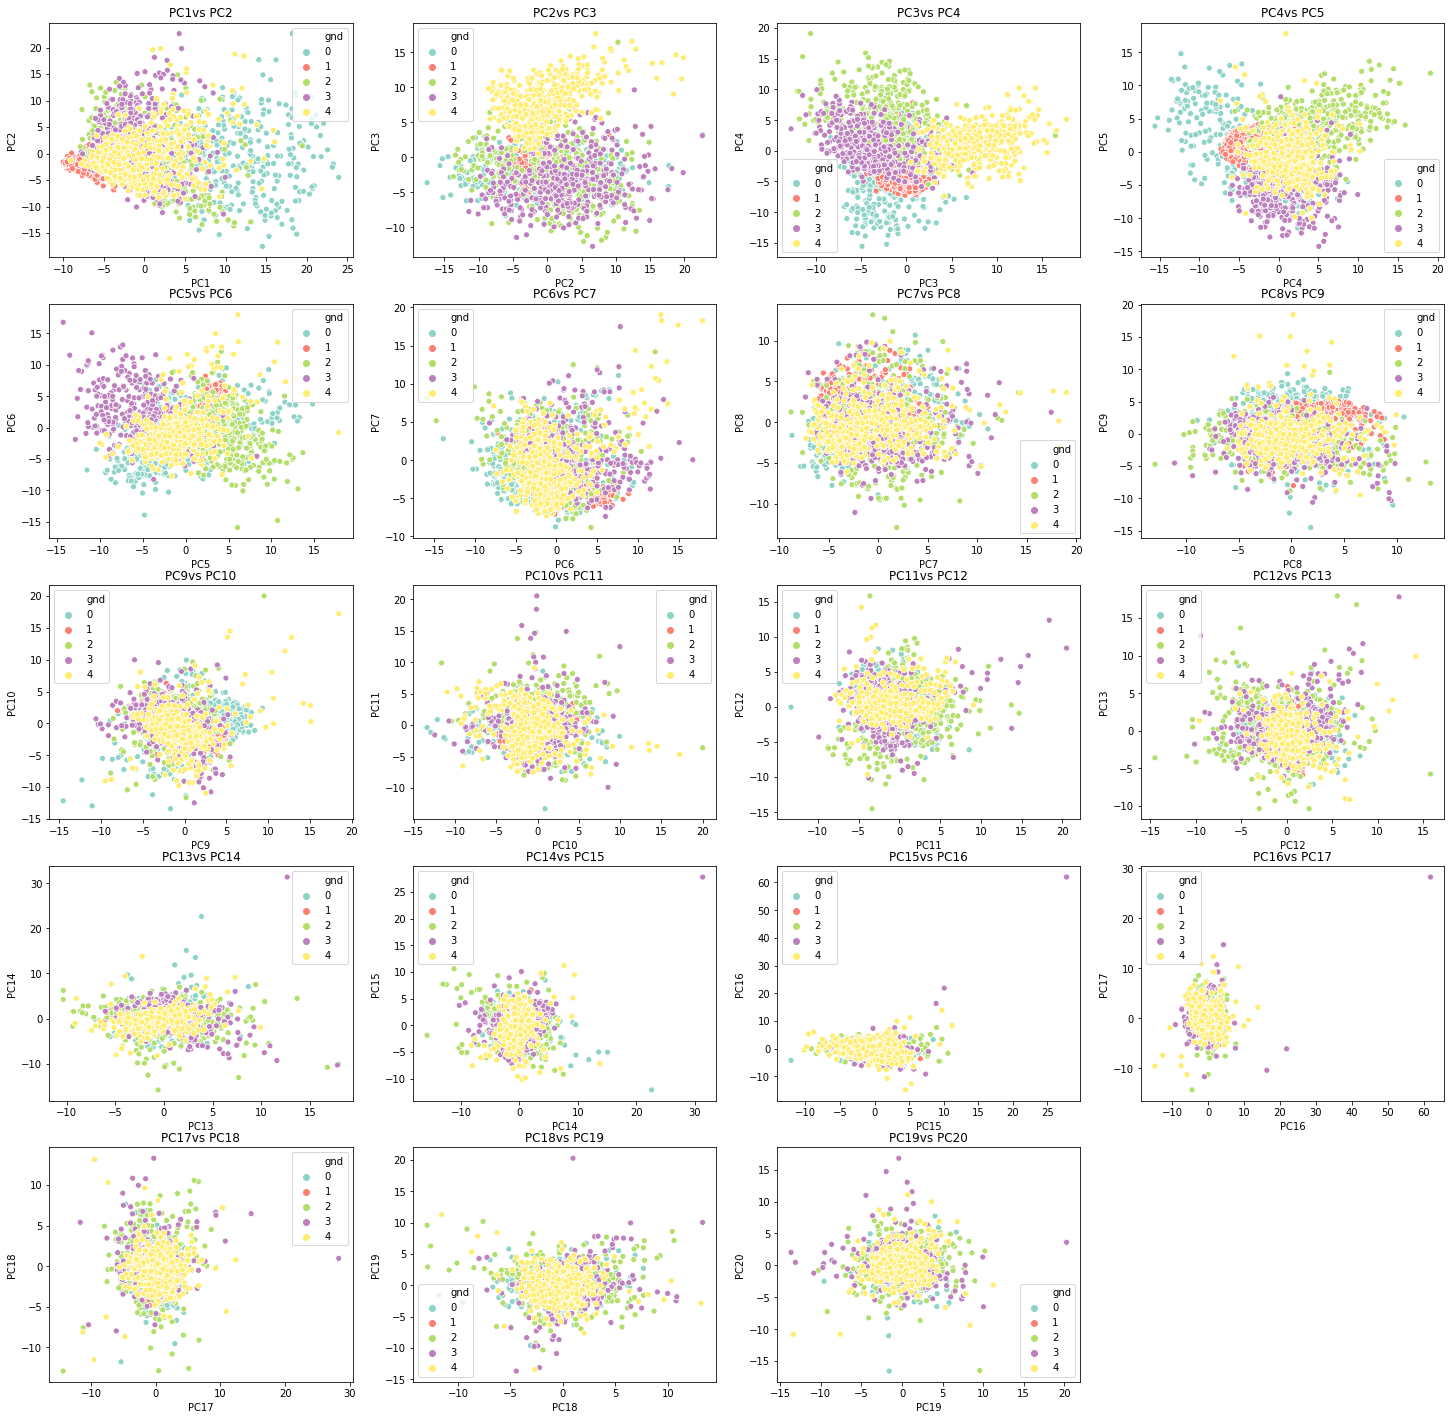

In [141]:
fig, ax = plt.subplots(5,4,figsize=(25,25))
k=0

fig.delaxes(ax[4][3])
for i in range(0,5):
    for j in range(0,4):
        sns.scatterplot(Transformed_datawithgnd_df[k], Transformed_datawithgnd_df[k+1], hue=Transformed_datawithgnd_df.gnd, legend='full', ax = ax[i,j], palette='Set3')
        ax[i,j].set(xlabel = 'PC' + str(k+1))
        ax[i,j].set(ylabel = 'PC' + str(k+2))
        ax[i,j].set_title('PC' + str(k+1) + 'vs PC' + str(k+2))

        if i == 4 and j==2:
            break
        k+=1

#### Analysis of scatter plots based on Top 20 Eigen values :

- Visually as a clear point, **local clusters of 5 classes can be visualized and distinguished till PC5 vs PC6**, however in case of visualizing datapoints with more than 6 components there exists high amount of overlapping among the clusters of all 5 classes.

- In last section, we identified that ~250 Eigen Values can be considered that carries decent amount of variance in the data, whereas on plotting the eigen vectors corresponding to these eigen values we can observe that only 6 components helps us in identifying the clusters of different classes.

#### Two Dimensional representation of PCA ('PC1 vs PC2' and 'PC5 vs PC6') 

In [200]:
# # ##Perform PCA
pca = PCA(n_components = 6, random_state=42)
Projected_PCA = pca.fit_transform(Norm_data)
print('After Implementing PCA, Projections are:\n', Projected_PCA)
print(Projected_PCA.shape)
print('\n')

##Converting projection Data into Dataframe
Proj_PCA_df = pd.DataFrame(Projected_PCA)
print('Projected PCA Dataframe is:\n', Proj_PCA_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

##Combining data with gnd values
PCA_Value_df = pd.concat([Proj_PCA_df.reset_index(drop=True), Value_df.reset_index(drop=True)], axis=1)
PCA_Value_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'gnd']
print('PCA Data along with Gnd Values:\n', PCA_Value_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

After Implementing PCA, Projections are:
 [[9.970692 -6.181912 -4.992824 -4.395366 -2.777613 -2.853395]
 [11.415998 -6.941688 -5.062810 -4.242408 -1.844750 -0.150392]
 [3.690120 -4.692979 -2.908776 3.935454 -6.812286 -3.219948]
 ...
 [-0.349422 -0.933771 8.107719 0.824239 -2.814165 -2.828484]
 [-3.115263 -2.090569 6.272585 -1.529967 -0.036249 -2.592085]
 [-5.644093 0.246305 4.139861 2.238890 -2.477499 -3.190933]]
(2066, 6)


Projected PCA Dataframe is:
               0         1         2         3         4         5
0      9.970692 -6.181912 -4.992824 -4.395366 -2.777613 -2.853395
1     11.415998 -6.941688 -5.062810 -4.242408 -1.844750 -0.150392
2      3.690120 -4.692979 -2.908776  3.935454 -6.812286 -3.219948
3      7.312408 -6.042831 -3.648041  3.507036 -4.562599 -5.521974
4     18.061519 -1.862520 -4.038835 -5.871925 -7.322308  4.436052
...         ...       ...       ...       ...       ...       ...
2061  -1.917925 -0.397613  7.951411  0.161595 -2.170133 -2.313369
2062   0.52575

#### PC1 vs PC2

First and Second Principal Components:
             PC1       PC2  gnd
0      9.970692 -6.181912    0
1     11.415998 -6.941688    0
2      3.690120 -4.692979    0
3      7.312408 -6.042831    0
4     18.061519 -1.862520    0
...         ...       ...  ...
2061  -1.917925 -0.397613    4
2062   0.525751  2.646650    4
2063  -0.349422 -0.933771    4
2064  -3.115263 -2.090569    4
2065  -5.644093  0.246305    4

[2066 rows x 3 columns]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


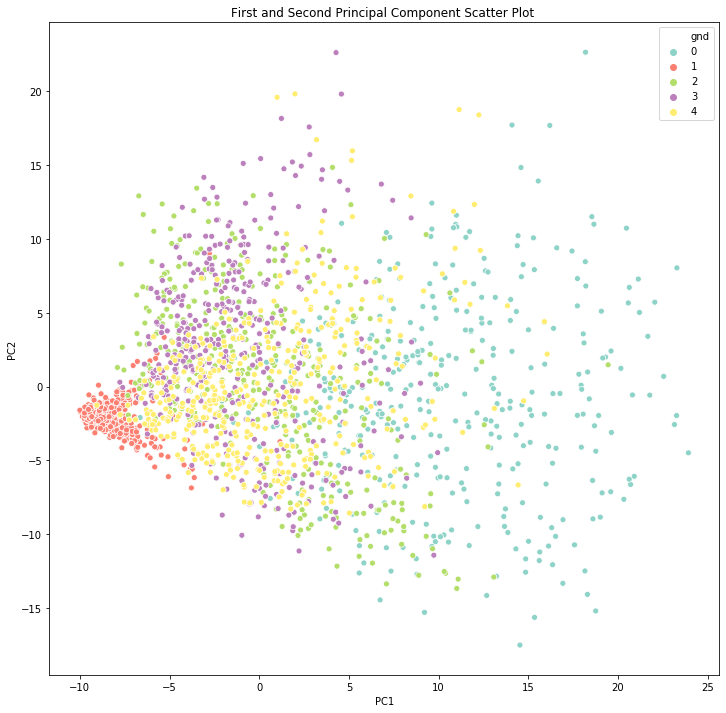

In [199]:
##First and Second PC
PC1_PC2_df = PCA_Value_df.drop(columns=['PC3', 'PC4', 'PC5', 'PC6'])
print('First and Second Principal Components:\n', PC1_PC2_df)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

##Scatter plot of data points
fig, axes = plt.subplots(figsize=(12,12))  
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=PC1_PC2_df, x='PC1', y='PC2', hue='gnd', hue_norm=(0,4), palette='Set3', ax=axes, cmap=cmap, legend='full')
plt.title('First and Second Principal Component Scatter Plot ')
plt.show()

#### "Result (Scatter Plot) vs Known Classes" Observations:

- Class 0: Widely distributed separable local cluster
- Class 1: separable local cluster
- Class 2, 3, 4 clusters are overlapped with each other.

#### PC5 vs PC6

Fifth and Sixth Principal Components:
            PC5       PC6  gnd
0    -2.777613 -2.853395    0
1    -1.844750 -0.150392    0
2    -6.812286 -3.219948    0
3    -4.562599 -5.521974    0
4    -7.322308  4.436052    0
...        ...       ...  ...
2061 -2.170133 -2.313369    4
2062 -2.257392  4.546371    4
2063 -2.814165 -2.828484    4
2064 -0.036249 -2.592085    4
2065 -2.477499 -3.190933    4

[2066 rows x 3 columns]




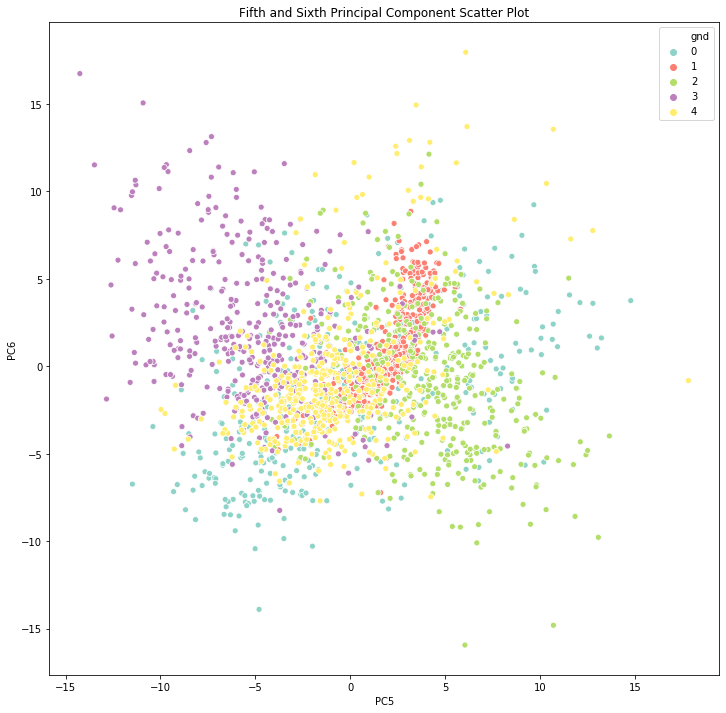

In [198]:
##PC5_PC6
PC5_PC6_df = PCA_Value_df.drop(columns=['PC1', 'PC2', 'PC3', 'PC4'])
print('Fifth and Sixth Principal Components:\n', PC5_PC6_df)
print('\n')

##Scatter plot of data points
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=PC5_PC6_df, x='PC5', y='PC6', hue='gnd', hue_norm=(0,4), palette='Set3', ax=axes, cmap=cmap, legend='full')
plt.title('Fifth and Sixth Principal Component Scatter Plot')
plt.show()

#### "Result (Scatter Plot) vs Known Classes" Observations:

- Class0: Widely distributed datapoint cluster
- Class1, Class2: Overlapped with other classes. 
- Class3: Individual local cluster (small overlapping than other classes)

#### Analysis Criterion for PC1 vs PC2 (For Comparison with PC5 vs PC6)

In [201]:
#### Correlation between principal components (PC1 vs PC2) and class(gnd)
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
Correlation = Transformed_datawithgnd_df[[0,1,'gnd']].corr()
#print(Correlation)
#print('\n')

Corr = Correlation.loc['gnd']
#print(Corr)

PC_list=['PC1', 'PC2']
PC_df = pd.DataFrame(PC_list)

Corr_PC = pd.concat([Corr, PC_df], axis=1)
Corr_PC.columns=['gnd', 'PC']
#print(Corr_PC)

C_PC = Corr_PC.set_index(['PC'])
print(C_PC)

          gnd
PC           
PC1 -0.194708
PC2  0.156830
NaN  1.000000


#### Analysis Criterion for PC5 vs PC6 (For Comparison with PC1 vs PC2)

In [202]:
#### Correlation between principal components (PC5 vs PC6) and class(gnd)
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
Correlation = Transformed_datawithgnd_df[[4,5,'gnd']].corr()
#print(Correlation)
#print('\n')

Corr = Correlation.loc['gnd']
#print(Corr)

PC_list=['PC5', 'PC6']
PC_df = pd.DataFrame(PC_list)

Corr_PC = pd.concat([Corr.reset_index(drop=True), PC_df.reset_index(drop=True)], axis=1)
Corr_PC.columns=['gnd', 'PC']
#print(Corr_PC)

C_PC = Corr_PC.set_index(['PC'])
print(C_PC)

          gnd
PC           
PC5 -0.251002
PC6  0.095018
NaN  1.000000


#### Comparison between "PC1 vs PC2" vs "PC5 vs PC6"

- Same Correlation (0.25 + 0.095 = 0.19 + 0.15 = 0.34) for both "PC1vs PC2" and "PC5vsPC6"
- PC1 vs PC2 captures more **amount of variance** in data (i.e. Adding eigen value of PC1 and PC2 = 80.5) as compared to PC5 vs PC6 (variance = 37.46)

------------------------------------------------------------------------------------------------------------------------------

#### PCA using SVD

#### Method 1: PCA using SVD Library (For verification purpose)

In [36]:
##Using SVD Libraries
# Step-1) SVD decomposition
U, S, Vh = np.linalg.svd(Norm_data, full_matrices=True)
print('Using SVD Library, U Matrix:\n', U)
print(U.shape)
print('\n')
print('Using SVD Library, V Matrix:\n', Vh)
print(Vh.shape)
print('\n')
print('S Matrix:\n', S)
print(S.shape)
print('\n')

Using SVD Library, U Matrix:
 [[ 0.03049267 -0.02534817  0.02123528 ... -0.00318707 -0.04082189
  -0.01126899]
 [ 0.03491276 -0.028464    0.02153371 ...  0.01548954 -0.00085919
   0.01186281]
 [ 0.01128523 -0.01924406  0.01237089 ... -0.01708609  0.01053288
  -0.03616937]
 ...
 [-0.00106861 -0.00382856 -0.03448198 ...  0.71398347  0.0080889
   0.00575192]
 [-0.00952719 -0.008572   -0.02667782 ...  0.01084765  0.64082146
   0.03738606]
 [-0.01726094  0.00100941 -0.01760873 ...  0.0169409   0.03061641
   0.72716903]]
(2066, 2066)


Using SVD Library, V Matrix:
 [[ 0.00197863  0.00151307 -0.00049178 ... -0.0001125  -0.00132315
   0.00591181]
 [-0.00493308  0.00640373  0.00156563 ... -0.00300533 -0.00947149
  -0.00287621]
 [ 0.00037529 -0.00258725  0.00372451 ...  0.00335936 -0.00553066
  -0.00624184]
 ...
 [-0.00294198 -0.00188671 -0.00838343 ... -0.00055758 -0.00186681
  -0.0001313 ]
 [ 0.00069225 -0.0040447  -0.00090736 ...  0.00319481  0.00012294
   0.00054035]
 [-0.00178531 -0.0047950

#### Method 2: PCA using SVD (Manual, No library)

In [216]:
##Manual Method for SVD
print('Manual Method:\n')
Start_PCA = time.time()
##We have Data and need to find Data Tranpose
D_transpose = D.transpose()
#print('Transpose of Normalised Data:\n', D_transpose)

##Matrix Multiplication
D_Dt = np.matmul(D, D_transpose)
# print('Matrix 1 is:\n', D_Dt)                 #n*n matrix
# print(D_Dt.shape)

# print('\n')

Dt_D = np.matmul(D_transpose, D)
# print('Matrix 2 is:\n', Dt_D)                 #n*n matrix
# print(Dt_D.shape)

##Eigen Value Decomposition of Matrix1
eig_val1, eig_vec1 = np.linalg.eig(D_Dt)
U = eig_vec1.real
Ut = U.transpose()
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
print('U Matrix (Left Singular Vectors):\n', U)
print(eig_vec1.shape)
print('\n')

##Eigen Value Decomposition of Matrix2
eig_val2, eig_vec2 = np.linalg.eig(Dt_D)
print('Eigen Values of A(T).A are:\n', eig_val2)
print('\n\n')
#print('Eigen Vectors of A(T).A are:\n', eig_vec2)           
#print('\n')
V = eig_vec2.T
print('V Matrix (Right Singular Vectors):\n', V )              ##Columns of V: Right Singular Vectors
Vt = V.transpose()
print(V.shape)
print('\n')

##Singular Values
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
Eig_Value2 = np.sqrt(eig_val2)
EV2 = Eig_Value2.tolist()
EV2_sorted = sorted(EV2)
EV2_reversed = list(reversed(EV2_sorted))
S = np.array(EV2_reversed)
#print(len(EV2))
print('Singular Values are:\n', S)
print(S.shape)
print('\n')
#S_diag_matrix = np.diag(S)
#print('S Diagonal Matrix:\n', S_diag_matrix)
#print('\n')

## Projection of  Data on PCA Subspace:
PD = np.dot(Ut, D)
print('Projected Data on PCA Subspace:\n', PD)
print('\n')

##Reconstruction of Data
RD = np.dot(U, PD)
print('Reconstructed Data:\n', RD)
print(RD.shape)
print('\n')
print('Normalised Data:\n', D)
print(D.shape)
print('\n\n')

End = (Start_PCA - time.time())
print('Time taken by PCA using SVD:\n', End)

Manual Method:

U Matrix (Left Singular Vectors):
 [[0.030493 -0.025348 0.021235 ... -0.004920 -0.004920 0.008740]
 [0.034913 -0.028464 0.021534 ... -0.000021 -0.000021 0.002824]
 [0.011285 -0.019244 0.012371 ... 0.000831 0.000831 -0.000234]
 ...
 [-0.001069 -0.003829 -0.034482 ... -0.002964 -0.002964 0.033878]
 [-0.009527 -0.008572 -0.026678 ... -0.045389 -0.045389 0.025748]
 [-0.017261 0.001009 -0.017609 ... 0.000704 0.000704 -0.033282]]
(2066, 2066)


Eigen Values of A(T).A are:
 [106920.164597 59473.785467 55281.930270 49416.164843 44552.456336
 32820.129346 28624.908752 24598.463284 22015.828839 20285.698578
 18819.039267 17114.634138 15426.005915 14840.859476 14492.618776
 13895.878533 12744.588612 12452.682944 12332.568619 11865.252722
 11494.656875 11028.866103 10965.144799 10474.598166 10123.042921
 9788.776585 9210.745699 9166.035978 9034.849404 8776.074334 8667.551375
 8532.398187 8273.801850 8052.670661 7890.442376 7760.306616 7642.301128
 7377.061646 7307.430543 7178.13179

#### Verification: U, S, V matrices (Using SVD Library) == U, S, V matrices (Manually)

#### Clearly for PCA, We are able to project the data on new dimensional space and reconstruct the projected data to original dimension space.
i.e. Reconstructed Data (2066,784) = Normalized Data (2066,784)

**Time Taken by PCA using SVD = 3.37sec**

----------------------------------------------------------------------------------------------------------------------------

#### Dual PCA using SVD

In [213]:
##Dual PCA
import time
Start = time.time()
##Manual Method for SVD
print('Manual Method:\n')
##We have Data and need to find Data Tranpose
D_transpose = D.transpose()
#print('Transpose of Normalised Data:\n', D_transpose)

Dt_D = np.matmul(D_transpose, D)
# print('Matrix 2 is:\n', Dt_D)                 #n*n matrix
# print(Dt_D.shape)

##Eigen Value Decomposition of Matrix2
eig_val, eig_vec = np.linalg.eig(Dt_D)

#V Matrix
V = eig_vec #Let V be the eigen vectors of Dt_D
print('V: Right Singular Vector\n', V)
print(V.shape)
print('-----------------------------------------------------------------------------------------------------------------')
Vt  = V.transpose()
#print('V Transpose:\n', Vt)
#print(Vt.shape) #(784,784)
#print('-----------------------------------------------------------------------------------------------------------------')
# S Singular Values
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
Eig_Value = np.sqrt(eig_val)
EV = Eig_Value.tolist()
EV_sorted = sorted(EV)
EV_reversed = list(reversed(EV_sorted))
S = np.array(EV_reversed)
#print(len(EV))
print('Singular Values are:\n', S)
#print(S.shape)
print('-----------------------------------------------------------------------------------------------------------------')

S_Diag_matrix = np.diag(S)                        # diagonal matrix of square roots of the eigenvalues
print('S: Diagonal Matrix\n', S_Diag_matrix)
#print(S_Diag_matrix.shape) #(784,784)
print('-----------------------------------------------------------------------------------------------------------------')

#U Matrix
S_inverse = np.linalg.inv(S_Diag_matrix)
print('Inverse of Singular values:\n', S_inverse)
print('-----------------------------------------------------------------------------------------------------------------')

U = np.dot(np.dot(D, V), S_inverse)                     # U = X.V.S_inverse
print('U:Left Singular Vector\n', U)
print(U.shape)
print('-----------------------------------------------------------------------------------------------------------------')

#Encodings of the data              #Y = U_transpose.Data = Singular Matrix.V_transpose
#(A) Projected Data on Dual PCA
Y_A = np.dot(S_Diag_matrix, Vt)
print('Projected Data:\n', Y_A)
#print(Y_A.shape)
print('-----------------------------------------------------------------------------------------------------------------')

# #(B) Projected Data on Normal PCA
# U_transpose = U.transpose()
# Y_B = np.dot(U_transpose, D)
# print('Projected Data on PCA Subspace:\n', Y_B)
# #print(Y_B.shape)
# print('-----------------------------------------------------------------------------------------------------------------')

#Reconstruction of data
X_bar1 = np.dot(np.dot(D,V), Vt)
print('Reconstructed Data1:\n', X_bar1)  #Same as Mean Centered Data
print('\n')

end = (Start - time.time())

X_bar2 = np.dot(np.dot(U, S_Diag_matrix), Vt)
print('Reconstructed Data2:\n', X_bar2)
print('\n\n')
print('Time taken by Dual PCA to reconstruct Normalized Data: ', end)

Manual Method:

V: Right Singular Vector
 [[-0.001979 0.004933 -0.000375 ... 0.000134 0.000623 0.001579]
 [-0.001513 -0.006404 0.002587 ... -0.002742 0.008373 -0.006399]
 [0.000492 -0.001566 -0.003725 ... -0.004458 -0.006835 0.001813]
 ...
 [0.000112 0.003005 -0.003359 ... -0.002459 0.000395 -0.000833]
 [0.001323 0.009471 0.005531 ... 0.010264 0.010706 -0.015379]
 [-0.005912 0.002876 0.006242 ... -0.003839 0.002464 -0.003278]]
(784, 784)
-----------------------------------------------------------------------------------------------------------------
Singular Values are:
 [326.986490 243.872478 235.121097 222.297469 211.074528 181.163267
 169.188973 156.838972 148.377319 142.427871 137.182504 130.822911
 124.201473 121.823066 120.385293 117.880781 112.891933 111.591590
 111.052099 108.927741 107.213138 105.018408 104.714587 102.345484
 100.613334 98.938246 95.972630 95.739417 95.051825 93.680704 93.099685
 92.370981 90.960441 89.736674 88.828162 88.092603 87.420256 85.889823
 85.483510 

#### In Dual PCA using SVD, U-V-S matrices are identified and reconstructed data = normalized data.

**Time taken by Dual PCA using SVD = 0.40 sec (Alot faster than PCA using SVD)**

#### Analysis:

- Computational time of Dual PCA (0.38sec) is much lesser than PCA(3.37 sec).

- Dual PCA takes less storage than PCA even though both have same results because Dual PCA doesn't deal with U(Left Singular Vector matrix with higher dimension) while reconstructing the projected data and performs eigenvectors computation of (Data_transpose*Data) which is much faster and easier.


#### References:

- http://www.math.uwaterloo.ca/~aghodsib/courses/f06stat890/notes/lec6.pdf
- https://youtu.be/jeOEXCFK30M
- https://youtu.be/ulLgihKiNY0
- https://arxiv.org/pdf/1906.03148.pdf
----------------------------------------------------------------------------------------------------------------------------

### 2.3 FDA / LDA:

#### Manual Implementation of LDA (Additional):

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

##Reading File
File = pd.read_csv("DataB.csv")
print(File)

##Removing first index column from file
Clean_data_df = File.iloc[:,1:786]
print(Clean_data_df)

##Separating Data from file (No Missing Values)
Data_df = Clean_data_df.iloc[:,0:784]
print(Data_df)
print(Data_df.describe())
X=Data_df.values

##Separating gnd values from file
Value_df = Clean_data_df.iloc[:,784]
print(Value_df)
y = Value_df.values
print('gnd array is:\n', y)

##Z-Score Normalization
Z_data = zscore(Data_df)
Norm_data = pd.DataFrame(Z_data)
#Norm_data = Norm_data.values
print(Norm_data)
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')



##LDA
# np.set_printoptions(precision=4)

# mean_vectors = []
# for cl in range(5):
#     mean_vectors.append(np.mean(X[y==cl], axis=0))
#     print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

##LDA

# Step 1) Compute Mean Vector of dataset

print('Mean Vector of Normalized Data should be 0 as data has been normalized already using Z Score Normalization\n\n')
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
mv = np.mean(Norm_data,axis=0).values.reshape(784,1)
print('mean vector:\n', mv)
print(mv.shape)
print('Hence Proved')
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

# # Step 2) Compute mean _vector per class
print('Result of np.unique:\n', np.unique(Clean_data_df['gnd']))
print('\n')

mv_k = []
for i, num in enumerate(np.unique(Clean_data_df['gnd'])):
    mv_k.append(np.mean(Norm_data.where(Clean_data_df['gnd']==num), axis=0))

print('Mean Vector per class:\n', mv_k)
print('\n\n')
print('Mean Vector Array:\n', np.array(mv_k))
print(np.array(mv_k).shape)
print('\n\n')
mv_k= np.array(mv_k).T
print('Mean Vector per class:\n', mv_k)           #(784,5)
print(mv_k.shape)

# Step 2) Compute Scatter Within and Between Matrixes

data_SW=[]
Nc=[]               #Number of instances in each class

for i, num in enumerate(np.unique(Clean_data_df['gnd'])):
    #print(Norm_data.where(Clean_data_df['gnd']==num).dropna().values.shape)
    a= np.array(Norm_data.where(Clean_data_df['gnd']==num).dropna().values - mv_k[:,i].reshape(1,784))
#print(a)

    data_SW.append(np.dot(a.T, a))
    Nc.append(np.sum(Clean_data_df['gnd']==num))

print('Data Within Scatter of each class:\n', data_SW)
print('\n\n')
print('Number of instances in each class:\n', Nc)
print('\n\n')

#Adding all the scatter matrixes to get the scatter within matrix
SW = np.sum(data_SW,axis=0)
print('Scatter Within Matrix:\n', SW)
print(SW.shape)
print('Hence Proved')
print('--------------------------------------------------------------------------------------------------------')
# ##Now creating between scatter matrix

SB = np.dot(Nc*np.array(mv_k - mv), np.array(mv_k - mv).T)
print('Scatter Between Matrix:\n', SB)
print(SB.shape)


# Step 3) Compute the Eigen Values and Eigen Vectors of SW-1*SB
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
eig_val, eig_vec = np.linalg.eig(np.dot(np.linalg.inv(SW), SB))
Eval_real = eig_val.real
Evec_real = eig_vec.real
print('Eigen Values are:\n', Eval_real)
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=')
print('Eigen Vectors are:\n', Evec_real)
print('\n')

# Eval_df = pd.DataFrame(Eval_real)
# Evec_df = pd.DataFrame(Evec_real)
# Eval_Evec_df = pd.concat([Eval_df, Evec_df], axis=1)
# print('Eigen Vector and Value Dataframe:\n', Eval_Evec_df)

##Creating EIgen Pairs
#np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
eig_pair=[(np.abs(Eval_real[i]), Evec_real[:,i]) for i in range(len(Eval_real))]
#print('Eigen Pairs are:\n', eig_pair)

#eig_pair_df = pd.DataFrame(eig_pair, columns=['Eval', 'Evec'])
#EP_df =eig_pair_df.set_index('Evec')
##print('Eigen Pair Dataframe:\n', EP_df)
#print('\n')
# EP = sorted(eig_pair)
# Eigen_Pair = list(reversed(EP))

# eig_vec_list=[]
# for i in range(4):
#     eig_vec_list.append(Eigen_Pair[i][1].reshape(784,1))
# EV_tuple = tuple(eig_vec_list)

# matrix = np.hstack(EV_tuple)
# New_data = Norm_data.dot(matrix)
# print('New Dimension Projected Data:\n', New_data.shape)

# ## Implementation using Library
# # ##Implementing LDA

# LDA = LinearDiscriminantAnalysis()
# Projected_LDA = LDA.fit_transform(Norm_data, Value_df)
# print('Projected Data:\n', Projected_LDA.shape)

# Projected_LDA_df = pd.DataFrame(Projected_LDA)
# print('Projected LDA Dataframe:\n', Projected_LDA_df)

# Variance = LDA.explained_variance_ratio_
# print('Variance:\n', Variance)

# eig_values = np.cumsum(np.round(Variance, decimals=3)*100)
# print('Eigne Values:\n', eig_values)

      Unnamed: 0  fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  \
0              1      4      4      3      0      0      4      2      1   
1              2      5      1      4      3      1      3      5      1   
2              3      1      3      0      3      1      1      0      1   
3              4      5      3      2      3      5      2      2      0   
4              5      3      5      3      3      0      4      1      1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2061        2062      4      0      3      0      4      0      4      3   
2062        2063      2      2      3      4      2      1      2      3   
2063        2064      2      3      2      3      1      2      5      5   
2064        2065      5      2      4      3      1      0      3      2   
2065        2066      3      3      1      3      2      5      4      2   

      fea.9  ...  fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  \
0         4  

#### LDA Implementation using sklearn

In [72]:
LDA = LinearDiscriminantAnalysis()
Projected_LDA = LDA.fit_transform(Norm_data, Value_df)
print('Projected Data:\n', Projected_LDA.shape)

Projected_LDA_df = pd.DataFrame(Projected_LDA)
print('Projected LDA Dataframe:\n', Projected_LDA_df)

Projected_LDA_value_df = pd.concat([Projected_LDA_df, Value_df], axis=1)
Projected_LDA_value_df.columns=['LD1', 'LD2', 'LD3', 'LD4', 'gnd']
print('Projected Data with Values:\n', Projected_LDA_value_df)

#Eigen_vec = LDA.scalings_
#print('Eigen Vectors are:\n', Eigen_vec)

#Variance = LDA.explained_variance_ratio_
#print('Variance:\n', Variance)

#eig_values = np.cumsum(np.round(Variance, decimals=3)*100)
#print('Eigne Values:\n', eig_values)

Projected Data:
 (2066, 4)
Projected LDA Dataframe:
              0         1         2         3
0    -5.277233 -2.052912  3.473823 -1.613518
1    -5.913727 -1.953482  3.665304  0.189606
2    -4.154543 -0.868888  1.172538  0.746605
3    -6.728769 -2.568941  4.442847 -0.640440
4    -6.977105 -2.125944  2.281978 -0.505802
...        ...       ...       ...       ...
2061 -1.493870  3.310943 -0.571532  0.611935
2062 -0.249322  4.925294  0.091210 -2.307546
2063 -1.311290  5.398086  0.216997 -1.333615
2064  0.213247  5.160965 -0.016662 -0.186851
2065  0.404523  4.317396 -0.313309  0.747472

[2066 rows x 4 columns]
Projected Data with Values:
            LD1       LD2       LD3       LD4  gnd
0    -5.277233 -2.052912  3.473823 -1.613518    0
1    -5.913727 -1.953482  3.665304  0.189606    0
2    -4.154543 -0.868888  1.172538  0.746605    0
3    -6.728769 -2.568941  4.442847 -0.640440    0
4    -6.977105 -2.125944  2.281978 -0.505802    0
...        ...       ...       ...       ...  ...
206

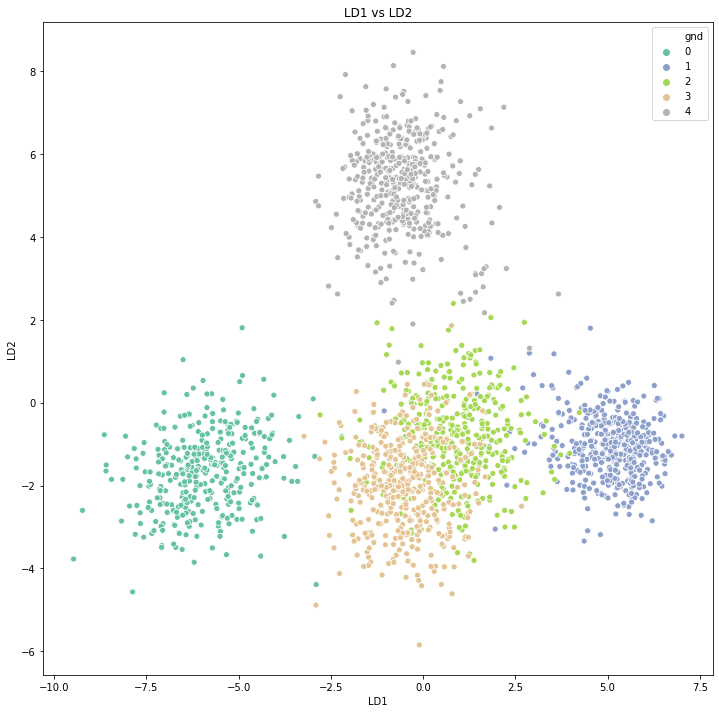

In [224]:
##Scatter plot of LD Components

#LD1 vs LD2
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data= Projected_LDA_value_df, x='LD1', y='LD2', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title('LD1 vs LD2')
plt.show()


##### LD1 vs LD2:

- **Class 0 and class 4 clusters "linearly separable"** in Scatter plot of LD1 vs LD2
- Class 2 and class 1 clusters are distinguishable however there exists small amount of are overlapped among their respective datapoints.
- Class 2 and Class 3 clusters has a great overlapping among their datapoints.

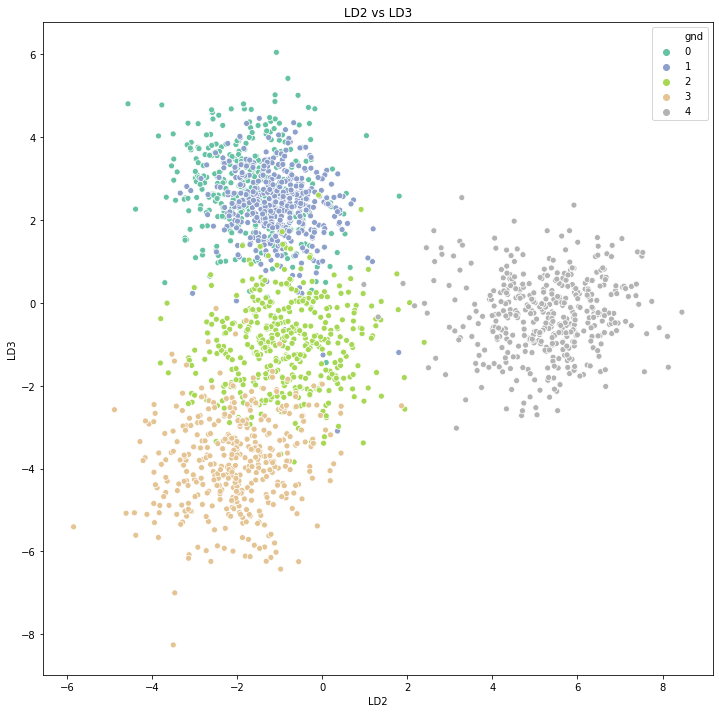

In [223]:
#LD2 vs LD3
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data= Projected_LDA_value_df, x='LD2', y='LD3', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title('LD2 vs LD3')
plt.show()

##### LD2 vs LD3:

- **Class 4 cluster is "linearly separable" from all other classes** in Scatter plot of LD2 vs LD3.
- Class 2 and Class 3 local cluster can be distinguished however there exists small amount of overlapping among datapoints of both the classes.
- Class 0 and class 1 clusters are completely overlapped with each other.

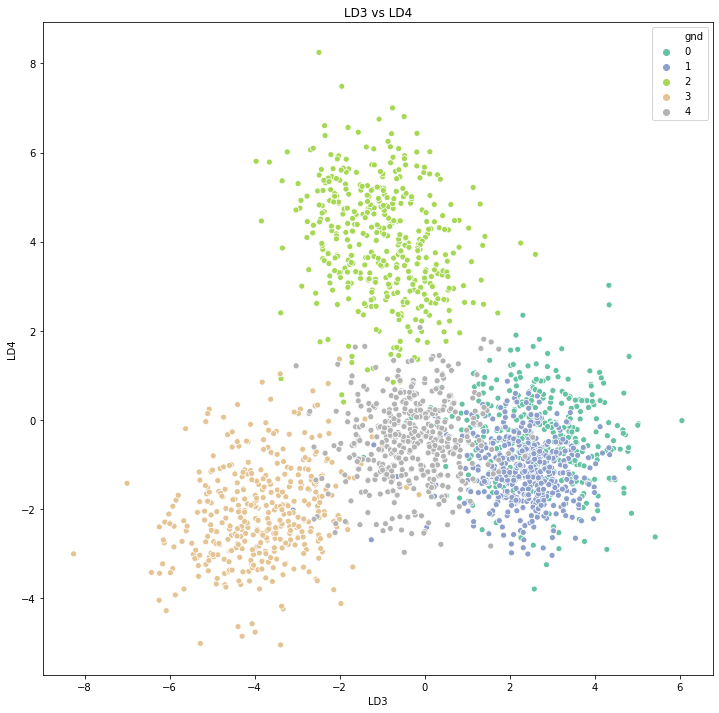

In [222]:
#LD3 vs LD4
fig, axes = plt.subplots(figsize=(12,12))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data= Projected_LDA_value_df, x='LD3', y='LD4', hue='gnd', hue_norm=(0,4), palette='Set2', ax=axes, cmap=cmap, legend='full')
plt.title('LD3 vs LD4')
plt.show()

##### LD2 vs LD3:

- **Class 2 cluster is "linearly separable" from all other classes** in Scatter plot of LD3 vs LD4.
- Class 4 and Class 3 local cluster can be distinguished however there exists small amount of overlapping among datapoints of both the classes.
- Class 0 and class 1 clusters are completely overlapped with each other.


#### References:

- https://arxiv.org/pdf/1906.09436.pdf (For theoretical Question 2.3.2)

-----------------------------------------------------------------------------------------------------------------------------

#### Comparison of "PC1 vs PC2, PC2 vs PC3, PC3 vs PC4" along with "LD1 vs LD2, LD2 vs LD3, LD3 vs LD4"

On comparing it is evident that LDA is performing much better than PCA in terms of class separability. All the 5  classes can be separated linearly (i.e. less overlapping) using different combination of LDA components whereas same is not the case with PCA.

**THE END**